In [3]:
import numpy as np
from keras.utils import to_categorical
from keras.datasets import cifar10

In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 142s 1us/step


In [5]:
NUM_CLASSES = 10

In [6]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categoricalgoricalgoricalgoricalgoricalraintastyperical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

In [7]:
from keras.layers import Input, Flatten, Dense
from keras.models import Model

In [43]:
input_layer = Input(shape=(32, 32, 3))

x = Flatten()(input_layer)

x = Dense(units = 300, activation = 'relu')(x)
x = Dense(units = 100, activation = 'relu')(x)

output_layer = Dense(units=NUM_CLASSES, activation='softmax')(x)

model = Model(input_layer, output_layer)

In [44]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 300)               921900    
_________________________________________________________________
dense_19 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_20 (Dense)             (None, 10)                1010      
Total params: 953,010
Trainable params: 953,010
Non-trainable params: 0
_________________________________________________________________


In [45]:
from keras.optimizers import Adam

opt = Adam(lr = 0.0005)

model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [46]:
model.fit(x_train, y_train, batch_size=32, epochs=10, shuffle=True)

Epoch 1/10
50000/50000 [==============================] - 12s 232us/step - loss: 1.8553 - acc: 0.3309
Epoch 2/10
50000/50000 [==============================] - 11s 226us/step - loss: 1.6721 - acc: 0.4030
Epoch 3/10
50000/50000 [==============================] - 11s 219us/step - loss: 1.5866 - acc: 0.4352
Epoch 4/10
50000/50000 [==============================] - 11s 217us/step - loss: 1.5302 - acc: 0.4561
Epoch 5/10
50000/50000 [==============================] - 10s 206us/step - loss: 1.4872 - acc: 0.4708
Epoch 6/10
50000/50000 [==============================] - 11s 225us/step - loss: 1.4576 - acc: 0.4803
Epoch 7/10
50000/50000 [==============================] - 10s 208us/step - loss: 1.4296 - acc: 0.4927
Epoch 8/10
50000/50000 [==============================] - 11s 211us/step - loss: 1.4042 - acc: 0.5002
Epoch 9/10
50000/50000 [==============================] - 11s 222us/step - loss: 1.3789 - acc: 0.5092
Epoch 10/10
50000/50000 [==============================] - 10s 203us/step - loss: 

In [47]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 90us/step


[1.4084427726745605, 0.5007]

In [48]:
CLASSES = np.array([
    'airplane',
    'automobile',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck',
])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

In [49]:
import matplotlib.pyplot as plt

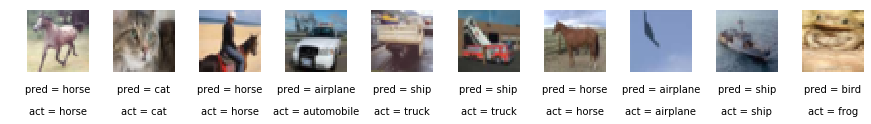

In [50]:
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15,3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = '+str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.text(0.5, -0.7, 'act = '+str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)

CNN

In [53]:
from keras.layers import Conv2D

In [62]:
cnn_input_layer = Input(shape = (32, 32, 3))

conv_1 = Conv2D(
    filters = 12,
    kernel_size = (4, 4),
    strides = 2,
    padding = 'same')(cnn_input_layer)

conv_2 = Conv2D(
    filters = 24,
    kernel_size = (3,3),
    strides = 2,
    padding = 'same')(conv_1)

flatten_layer = Flatten()(conv_2)
output_layer = Dense(units = NUM_CLASSES, activation = 'softmax')(flatten_layer)

cnn_model = Model(cnn_input_layer, output_layer)

In [63]:
cnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 12)        588       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 24)          2616      
_________________________________________________________________
flatten_8 (Flatten)          (None, 1536)              0         
_________________________________________________________________
dense_22 (Dense)             (None, 10)                15370     
Total params: 18,574
Trainable params: 18,574
Non-trainable params: 0
_________________________________________________________________


In [64]:
cnn_model.compile(optimizer=opt, loss = 'categorical_crossentropy', metrics=['accuracy'])

In [65]:
cnn_model.fit(x_train, y_train, epochs=10, shuffle=True, batch_size=32)

Epoch 1/10
50000/50000 [==============================] - 11s 229us/step - loss: 1.7954 - acc: 0.3772
Epoch 2/10
50000/50000 [==============================] - 11s 219us/step - loss: 1.7176 - acc: 0.4137
Epoch 3/10
50000/50000 [==============================] - 11s 221us/step - loss: 1.7011 - acc: 0.4218
Epoch 4/10
50000/50000 [==============================] - 11s 221us/step - loss: 1.6935 - acc: 0.4230
Epoch 5/10
50000/50000 [==============================] - 11s 224us/step - loss: 1.6850 - acc: 0.4268
Epoch 6/10
50000/50000 [==============================] - 11s 223us/step - loss: 1.6794 - acc: 0.4282
Epoch 7/10
50000/50000 [==============================] - 11s 216us/step - loss: 1.6737 - acc: 0.4307
Epoch 8/10
50000/50000 [==============================] - 11s 217us/step - loss: 1.6703 - acc: 0.4311
Epoch 9/10
50000/50000 [==============================] - 10s 204us/step - loss: 1.6660 - acc: 0.4357
Epoch 10/10
50000/50000 [==============================] - 11s 224us/step - loss: 

In [66]:
cnn_model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 124us/step


[1.7315297397613525, 0.3975]

CNN model 2

In [67]:
from keras.layers import BatchNormalization, LeakyReLU, Dropout

In [69]:
x = Conv2D(filters=32, kernel_size=3, strides=1, padding='same')(cnn_input_layer)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters=32, kernel_size=3, strides=2, padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters=64, kernel_size=3, strides=1, padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters=64, kernel_size=3, strides=2, padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Flatten()(x)

x = Dense(units = 128)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(rate = 0.5)(x)

output_layer = Dense(units=NUM_CLASSES, activation='softmax')(x)

cnn_model2 = Model(cnn_input_layer, output_layer,)

In [70]:
cnn_model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_6 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
batch_normalization_7 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 16, 16, 32)        0         
__________

In [71]:
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [72]:
model.fit(x=x_train, y=y_train, batch_size=32, epochs=10)

Epoch 1/10
50000/50000 [==============================] - 24s 485us/step - loss: 1.4614 - acc: 0.4801
Epoch 2/10
50000/50000 [==============================] - 27s 532us/step - loss: 1.3526 - acc: 0.5174
Epoch 3/10
50000/50000 [==============================] - 23s 453us/step - loss: 1.3282 - acc: 0.5263
Epoch 4/10
50000/50000 [==============================] - 28s 565us/step - loss: 1.3080 - acc: 0.5350
Epoch 5/10
50000/50000 [==============================] - 23s 464us/step - loss: 1.2907 - acc: 0.5402
Epoch 6/10
50000/50000 [==============================] - 21s 419us/step - loss: 1.2762 - acc: 0.5461
Epoch 7/10
50000/50000 [==============================] - 16s 324us/step - loss: 1.2592 - acc: 0.5526
Epoch 8/10
50000/50000 [==============================] - 23s 458us/step - loss: 1.2502 - acc: 0.5533
Epoch 9/10
50000/50000 [==============================] - 21s 411us/step - loss: 1.2360 - acc: 0.5596
Epoch 10/10
50000/50000 [==============================] - 21s 421us/step - loss: 

In [73]:
model.evaluate(x = x_test, y = y_test)

10000/10000 [==============================] - 2s 224us/step


[1.3973875562667846, 0.5063]